In [83]:
import pandas as pd
from utils.get_parameters import max_score_for_each
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./results/general/full_data_performances_9_models_5_balancers.csv")

In [44]:
set_ = 'Test'
metric = 'AUC'

data = df[(df['Set'] == set_) & (df['MainMetric'] == metric)] 

data.sort_values(["Imputer","Imbalance","Score"],ascending=[True,True,False],inplace=True)

/tmp/ipykernel_233133/2677375501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(["Imputer","Imbalance","Score"],ascending=[True,True,False],inplace=True)


In [68]:
ranked_df = data.groupby(["Imputer","Imbalance"])['Score'].rank(method='min').to_frame().reset_index()
index = ranked_df[ranked_df['Score'] == 1]['index'].values.tolist()

In [69]:
data

,Algorithm,Imputer,Imbalance,Metric,Score,Set,MainMetric
1058,RandomForest,KNNImptuer__SimpleImputer_mode,ADASYN,Test-AUC,98.20,Test,AUC
1059,GradientBoosting,KNNImptuer__SimpleImputer_mode,ADASYN,Test-AUC,97.98,Test,AUC
1060,Bagging,KNNImptuer__SimpleImputer_mode,ADASYN,Test-AUC,97.91,Test,AUC
1061,XGBoost,KNNImptuer__SimpleImputer_mode,ADASYN,Test-AUC,97.83,Test,AUC
1057,SVM,KNNImptuer__SimpleImputer_mode,ADASYN,Test-AUC,97.51,Test,AUC
...,...,...,...,...,...,...,...
994,SVM,SimpleImputer_mean__SimpleImputer_mode,SMOTE,Test-AUC,97.68,Test,AUC
990,LogisticRegression,SimpleImputer_mean__SimpleImputer_mode,SMOTE,Test-AUC,97.62,Test,AUC
991,DecisionTree,SimpleImputer_mean__SimpleImputer_mode,SMOTE,Test-AUC,97.31,Test,AUC
993,KNN,SimpleImputer_mean__SimpleImputer_mode,SMOTE,Test-AUC,96.67,Test,AUC


In [74]:
# overal_best_performed_train = max_score_for_each(df,by=['Imputer','Imbalance','MainMetric'],set_='Train')

In [136]:
def plot_best_performed_counts(df,by=['Imputer','Imbalance','MainMetric'],set_='Test'):
    
    overal_best_performed_test = max_score_for_each(df=df,by=by,set_=set_)
    
    counts_of_the_best_perfomred = overal_best_performed_test.Algorithm.value_counts().to_frame().reset_index()
    
    fig,ax = plt.subplots(1,1)

    fig.suptitle(f"The best scores counts for each algorithm on {set_} set ")
    
    ax.barh(counts_of_the_best_perfomred['Algorithm'], counts_of_the_best_perfomred['count'], color='orange')
    
    for j, value in enumerate(counts_of_the_best_perfomred['count']):
        ax.annotate(f"{str(value)} [{round(value/60*100,2)}%]", xy=(value,j), ha='left', va='center')
    
    ax.invert_yaxis()
    ax.set_xlabel("Score")
    
    return counts_of_the_best_perfomred

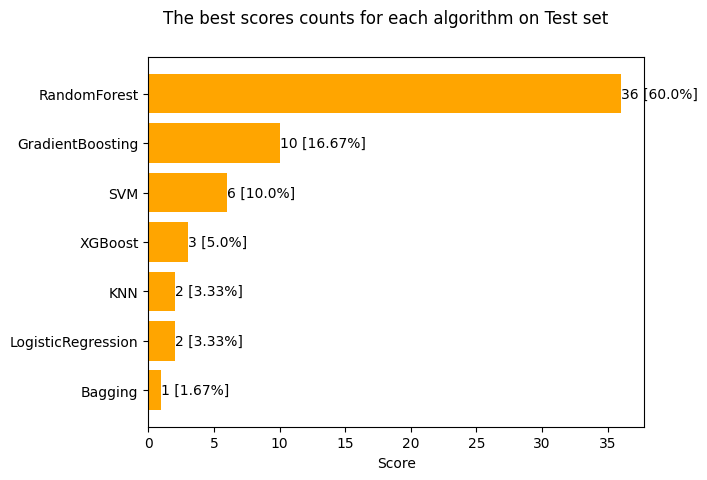

In [137]:
counts = plot_best_performed_counts(df)

In [138]:
final_output = pd.read_csv("./results/general/best_results_all_models.csv")
final_output['Imputer'] = final_output['ImputerCat'] + "__" + final_output['ImputerNum']

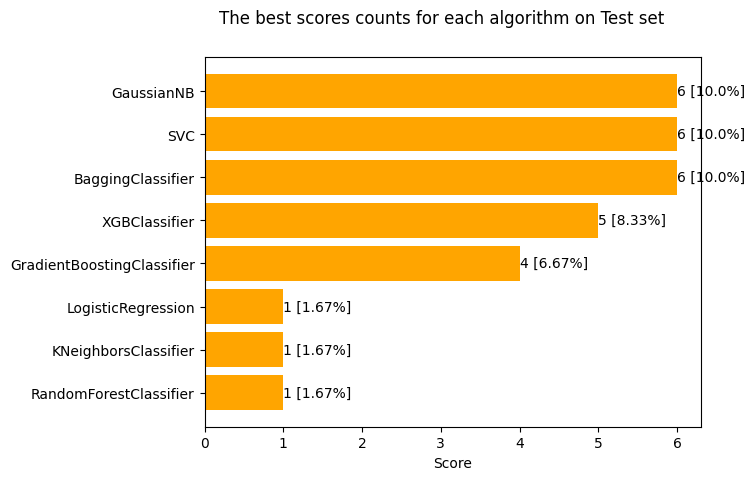

In [139]:
final_count = plot_best_performed_counts(final_output,by=['Imbalance','Imputer','Metric'])

In [143]:
final_output[final_output['Set'] == 'Test'].sort_values(["Imbalance","Imputer",'Score'])

,Algorithm,Imbalance,ImputerCat,ImputerNum,Set,Metric,Score,Imputer
92,GaussianNB,ADASYN,SimpleImputer_mode,KNNImptuer,Test,Kappa,88.88,SimpleImputer_mode__KNNImptuer
93,GaussianNB,ADASYN,SimpleImputer_mode,KNNImptuer,Test,Recall,91.79,SimpleImputer_mode__KNNImptuer
91,GaussianNB,ADASYN,SimpleImputer_mode,KNNImptuer,Test,F-1,94.15,SimpleImputer_mode__KNNImptuer
95,GaussianNB,ADASYN,SimpleImputer_mode,KNNImptuer,Test,AUC,94.38,SimpleImputer_mode__KNNImptuer
90,GaussianNB,ADASYN,SimpleImputer_mode,KNNImptuer,Test,Accuracy,94.45,SimpleImputer_mode__KNNImptuer
94,GaussianNB,ADASYN,SimpleImputer_mode,KNNImptuer,Test,Precision,96.64,SimpleImputer_mode__KNNImptuer
68,DecisionTreeClassifier,MWMOTE,SimpleImputer_mode,KNNImptuer,Test,Kappa,82.93,SimpleImputer_mode__KNNImptuer
69,DecisionTreeClassifier,MWMOTE,SimpleImputer_mode,KNNImptuer,Test,Recall,89.83,SimpleImputer_mode__KNNImptuer
67,DecisionTreeClassifier,MWMOTE,SimpleImputer_mode,KNNImptuer,Test,F-1,91.35,SimpleImputer_mode__KNNImptuer
66,DecisionTreeClassifier,MWMOTE,SimpleImputer_mode,KNNImptuer,Test,Accuracy,91.47,SimpleImputer_mode__KNNImptuer


In [150]:
final_output[final_output['Set'] == 'Test'][['Algorithm','Imbalance']].drop_duplicates().value_counts("Imbalance")

Imbalance
MWMOTE    5
SMOTE     3
ADASYN    1
Name: count, dtype: int64